In [2]:
pip install category_encoders

     |████████████████████████████████| 82 kB 551 kB/s             
Note: you may need to restart the kernel to use updated packages.


In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'data-448'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Chapter3/profiles_revised.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
profiles = pd.read_csv(file_content_stream)
profiles.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


## One-Hot-Encoder (using pandas)

In [32]:
## Creating frequency table of drinks 
y = profiles['drinks'].dropna()
y.value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [33]:
## Creating dummies 
drinks_dummy = pd.get_dummies(y)
drinks_dummy.head()

,desperately,not at all,often,rarely,socially,very often
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


## One-Hot-Encoder (using LabelBinarizer)

In [35]:
## Creating dummies
LabelBinarizer().fit_transform(y)

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]])

## One-Hot-Encoder (using OneHotEncoder)

In [47]:
## Creating dummies
OneHotEncoder().fit_transform(y.to_numpy().reshape(-1, 1)).toarray()

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

## Feature Hashing

In [23]:
from sklearn.feature_extraction import FeatureHasher

X = FeatureHasher(n_features = 8, input_type = 'string', alternate_sign = False).transform(profiles['diet'].dropna())
X = X.toarray()
X

array([[1., 2., 2., ..., 3., 2., 1.],
       [1., 1., 0., ..., 1., 1., 2.],
       [0., 0., 2., ..., 2., 1., 0.],
       ...,
       [1., 0., 2., ..., 2., 2., 1.],
       [1., 0., 2., ..., 2., 2., 1.],
       [1., 0., 2., ..., 2., 2., 1.]])

## Engineering Numeric Predictors

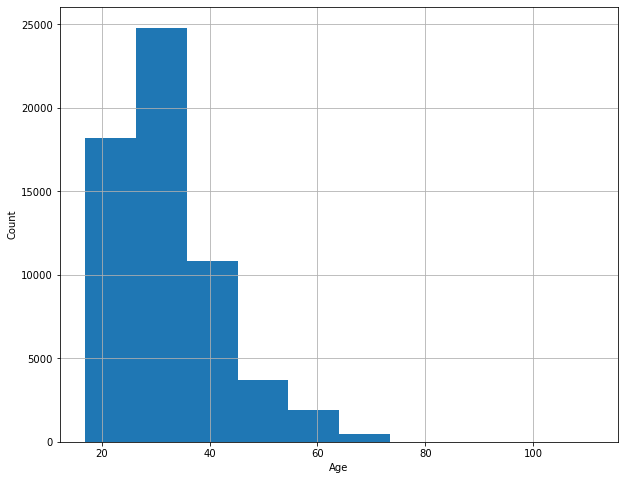

In [5]:
plt.figure(figsize = (10, 8))

## Histogram of age
plt.hist(profiles['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()

## saving the plot
plt.savefig('chapter3_plot1.pdf')

plt.show()